<img src='https://training.dwit.edu.np/frontend/images/computer-training-institute.png'>
<h1>Data Science and Machine learning in Python</h1>
<h3>Instructor: <a href='https://www.kaggle.com/atishadhikari'> Atish Adhikari</a></h3>
<hr>

## Convolutional Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train / 255).reshape(60000, 28, 28, 1)
X_test = (X_test / 255).reshape(10000, 28, 28, 1)

In [4]:
X_train.shape

(60000, 28, 28, 1)

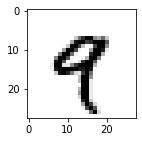

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[4].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [22]:
cnn = Sequential()

cnn.add( Conv2D(input_shape=(28,28,1), filters=4, kernel_size=(3,3), activation="relu"))
cnn.add(Dropout(0.25))
cnn.add( Conv2D(filters=6, kernel_size=(3,3), activation="relu"))
cnn.add(MaxPool2D())

cnn.add( Conv2D(filters=8, kernel_size=(3,3), activation="relu"))
cnn.add(Dropout(0.25))
cnn.add( Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
cnn.add(Dropout(0.25))
cnn.add( Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
cnn.add(MaxPool2D())
cnn.add(Flatten())
        
cnn.add(Dense(units=64, activation="tanh"))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=16, activation="tanh"))
#output Layer
cnn.add(Dense(units=10, activation="softmax"))

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_208 (Conv2D)          (None, 26, 26, 4)         40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 4)         0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 24, 24, 6)         222       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 10, 10, 8)         440       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 8, 8, 16)         

In [11]:
cnn.fit(X_train, y_train_cat, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 25s 15ms/step - loss: 0.4191 - accuracy: 0.8783 - val_loss: 0.1010 - val_accuracy: 0.9723
Epoch 2/3
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1571 - accuracy: 0.9541 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 3/3
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1229 - accuracy: 0.9628 - val_loss: 0.0724 - val_accuracy: 0.9768


In [12]:
y_pred = cnn.predict(X_test)

In [13]:
y_pred[0].argmax()

7

In [14]:
def plot_image(i, y_pred, y_test_class, img, class_names):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)   


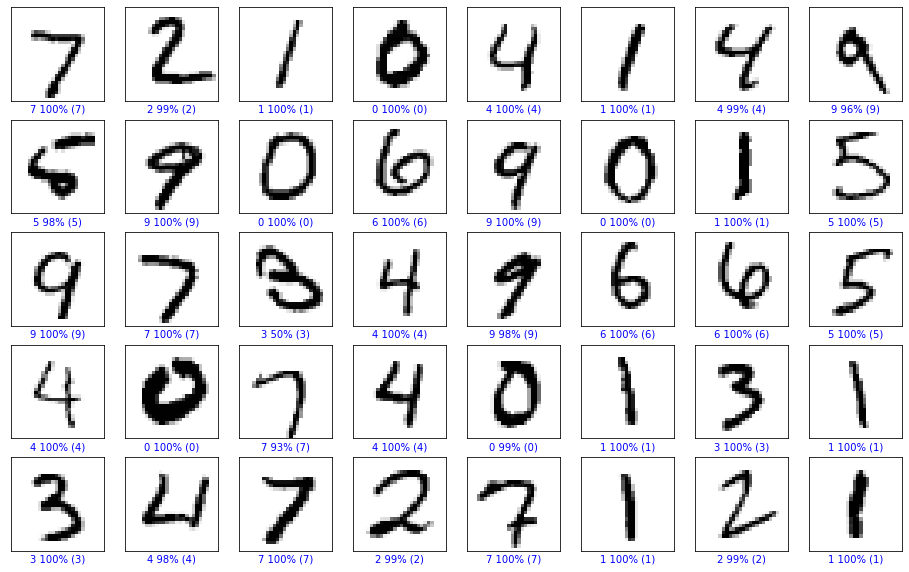

In [15]:
class_names = [str(x) for x in range(10)]
num_rows = 5
num_cols = 8

num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test.reshape(10000, 28, 28), class_names)
plt.show() 

In [16]:
from sklearn.metrics import classification_report, accuracy_score

In [17]:
y_pred_class = y_pred.argmax(axis=1)

In [18]:
y_pred_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred_class)

0.9803

In [24]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
#Download this cnn

In [20]:
from tensorflow.keras.applications import InceptionResNetV2

In [21]:
model = InceptionResNetV2(weights="imagenet")